# План исследования 

    1) Импорт библиотек и данных 
    
    2) Проверка качества данных
        - пропуски
        - дубликаты
    
    3) Первичный анализ
        - визуальный
        - основные статистики
        - статистики по категориальным признакам
        
    
    4) EDA 
        - визуализация признаков
        - кореляции 
        - снижение размерности разными алгоритмами (PCA, T_NSE, UMAP)
        
    5) Кластеризация без классов (должно быть 3 кластера или 2) 
    
        - иерархическая клатеризация 
            * сырого датасета 
            * датасета с уменьшенной размерностью 
            
        - k-means 
            * сырого датасета 
            * датасета с уменьшенной размерностью 
            
        - DBSCAN 
            * сырого датасета 
            * датасета с уменьшенной размерностью 
            
        - Сравнение моделей метриками
       
    6) Выводы 
    

# Импорт библиотек и данных

In [274]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import seaborn as sns
import matplotlib.pyplot as plt
# Pretty display for notebooks
%matplotlib inline

import plotly.express as px

from scipy import stats as st


from sklearn.manifold import TSNE

import umap

In [3]:
data = pd.read_csv('customers.csv')

In [88]:
data.duplicated().sum()

0

In [89]:
data.isna().sum()

channel             0
region              0
fresh               0
milk                0
grocery             0
frozen              0
detergents_paper    0
delicatessen        0
dtype: int64

С данными все в порядке, нет пропусков и нет дубликатов. 

## Первичный анализ 

In [90]:
data.sample(10)

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicatessen
257,1,1,8475,1931,1883,5004,3593,987
214,2,1,2362,6551,11364,913,5957,791
95,1,3,3,2920,6252,440,223,709
112,1,3,19046,2770,2469,8853,483,2708
430,1,3,3097,4230,16483,575,241,2080
23,2,3,26373,36423,22019,5154,4337,16523
172,1,3,955,5479,6536,333,2840,707
242,1,1,18226,659,2914,3752,586,578
92,2,3,9198,27472,32034,3232,18906,5130
106,2,3,1454,6337,10704,133,6830,1831


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   channel           440 non-null    int64
 1   region            440 non-null    int64
 2   fresh             440 non-null    int64
 3   milk              440 non-null    int64
 4   grocery           440 non-null    int64
 5   frozen            440 non-null    int64
 6   detergents_paper  440 non-null    int64
 7   delicatessen      440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [17]:
data.columns = [str.lower(i) for i in data.columns]

In [79]:
data.iloc[:, ~data.columns.isin(['channel', 'region'])].describe().round(2)

,fresh,milk,grocery,frozen,detergents_paper,delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


In [91]:
features = data.iloc[:, ~data.columns.isin(['channel', 'region'])].columns

# EDA 

## Основные статистики по регионам и каналу привлечения

In [80]:
data.groupby('region').agg({'fresh':'mean', 'milk':'mean', 
                            'grocery':'mean', 'frozen':'mean',
                            'delicatessen':'mean' }).round(2)

,fresh,milk,grocery,frozen,delicatessen
region,,,,,
1,11101.73,5486.42,7403.08,3000.34,1354.9
2,9887.68,5088.17,9218.60,4045.36,1159.7
3,12533.47,5977.09,7896.36,2944.59,1620.6


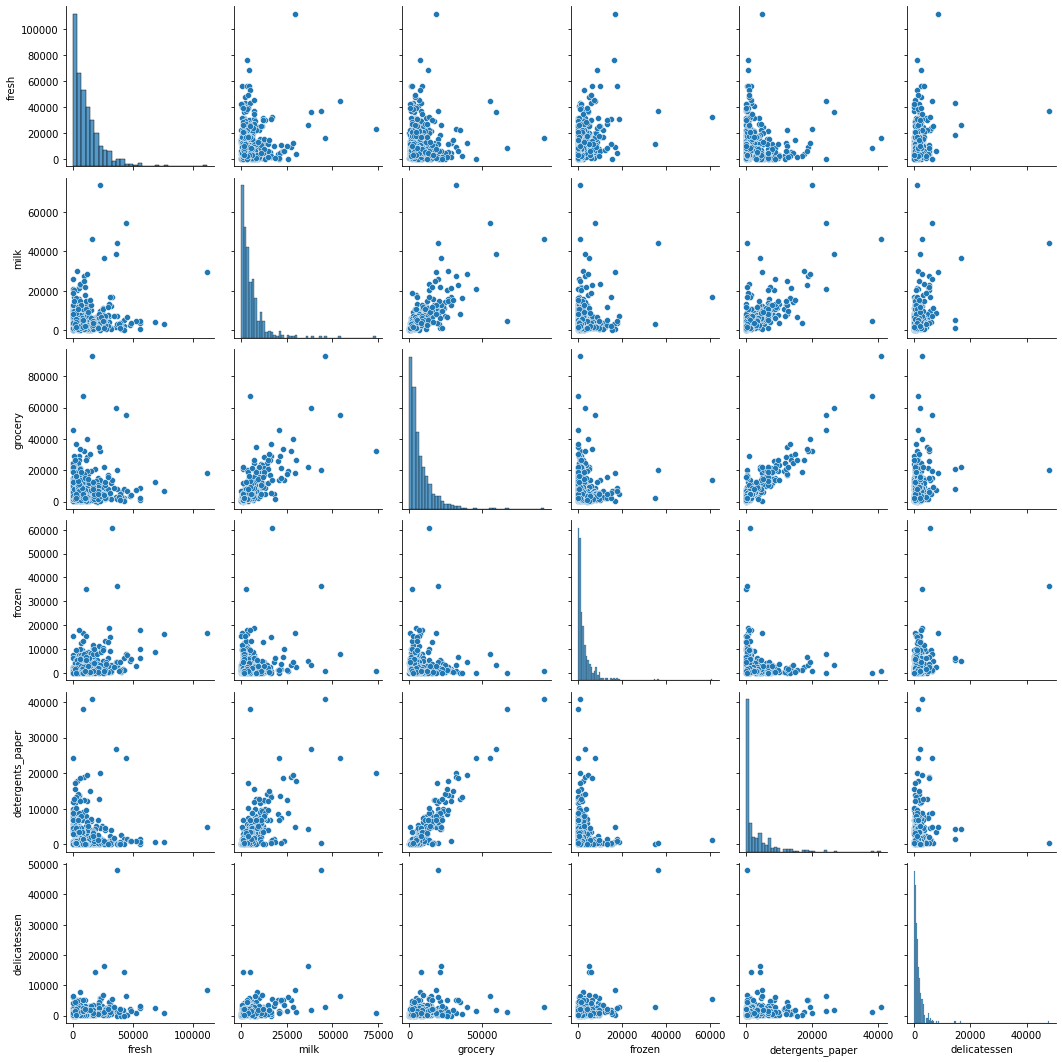

In [84]:
sns.pairplot(data.iloc[:, ~data.columns.isin(['channel', 'region'])]);

In [81]:
data.groupby('channel').agg({'fresh':'mean', 'milk':'mean', 
                            'grocery':'mean', 'frozen':'mean',
                            'delicatessen':'mean' }).round(2)

,fresh,milk,grocery,frozen,delicatessen
channel,,,,,
1,13475.56,3451.72,3962.14,3748.25,1415.96
2,8904.32,10716.50,16322.85,1652.61,1753.44


In [95]:
data.groupby('channel').agg({'fresh':'median', 'milk':'median', 
                            'grocery':'median', 'frozen':'median',
                            'delicatessen':'median' }).round(2)

,fresh,milk,grocery,frozen,delicatessen
channel,,,,,
1,9581.5,2157,2684,2057.5,821
2,5993.5,7812,12390,1081.0,1350


In [172]:
l = [5,5,5,5, 5,5,5,5,5,5,5,5,5,5,5,5,5,100000]
k = [5,5,100,11]

In [173]:
(pd.Series(k)).describe()

count      4.000000
mean      30.250000
std       46.585942
min        5.000000
25%        5.000000
50%        8.000000
75%       33.250000
max      100.000000
dtype: float64

In [140]:
len(l)

20

In [94]:
data.groupby('region').agg({'fresh':'median', 'milk':'median', 
                            'grocery':'median', 'frozen':'median',
                            'delicatessen':'median' }).round(2)

,fresh,milk,grocery,frozen,delicatessen
region,,,,,
1,7363.0,3748.0,3838,1801,806
2,8090.0,2374.0,6114,1455,898
3,8752.5,3684.5,4732,1498,994


In [116]:
fig = px.box(data[features], color = data['channel'])
fig.show()

In [117]:
fig = px.box(data[features], color = data['region'])
fig.show()

<AxesSubplot:>

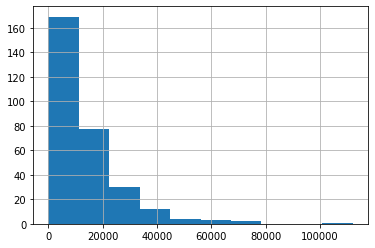

In [174]:
data.query('channel==1')['fresh'].hist()

<AxesSubplot:>

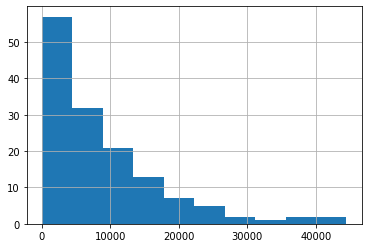

In [175]:
data.query('channel==2')['fresh'].hist()

In [120]:
alpha = .05 # критический уровень статистической значимости

results = st.mannwhitneyu(data.query('channel==1')['fresh'], data.query('channel==2')['fresh'])

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя") 

p-значение:  9.184436355001133e-05
Отвергаем нулевую гипотезу: разница статистически значима


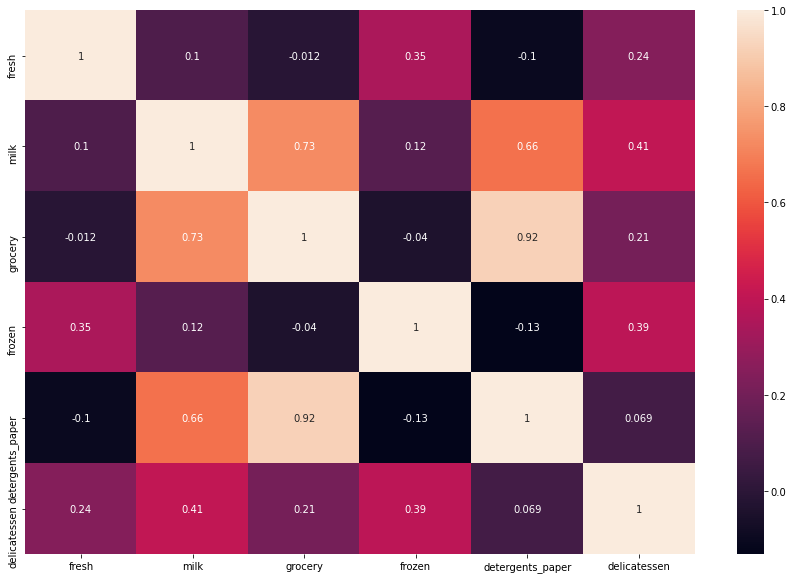

In [78]:
plt.figure(figsize = (15,10))
sns.heatmap(data.iloc[:, ~data.columns.isin(['channel', 'region'])].corr(), annot = True);

# Снижение размерности

Попробуем определить количество кластеров с помозью снижения размерности. 

- PCA 
- TNSE 
- UMAP 

## PCA

In [198]:
np.log(data[features])

,fresh,milk,grocery,frozen,detergents_paper,delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
...,...,...,...,...,...,...
435,10.299003,9.396903,9.682030,9.483036,5.204007,7.698029
436,10.577146,7.266129,6.638568,8.414052,4.532599,7.760467
437,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
438,9.238928,7.591357,7.710653,6.945051,5.123964,7.661527


In [312]:
pca = PCA(n_components = 2, random_state=0)
pca_data = pca.fit_transform(np.log(data[features]))

In [313]:
pca_data

array([[-1.75098532e+00, -7.05152286e-02],
       [-1.80036534e+00, -8.69753573e-01],
       [-1.89373597e+00, -1.67662072e+00],
       [ 1.12731297e+00, -1.45798229e+00],
       [-7.96711467e-01, -2.46086569e+00],
       [-1.08382370e+00, -3.92942430e-01],
       [-1.13261002e+00,  2.01601862e-01],
       [-1.58247377e+00, -9.68196420e-01],
       [-8.71825215e-01,  5.96758895e-01],
       [-2.88888315e+00, -7.41102520e-01],
       [-2.11616786e+00, -7.48845431e-01],
       [ 9.91451442e-01, -6.27014670e-02],
       [-2.23259521e+00, -1.32782770e+00],
       [-1.90404777e+00, -1.33385723e+00],
       [-2.33337847e+00, -9.83570924e-01],
       [ 4.17284069e-01,  8.14298928e-01],
       [-2.80513630e+00,  1.95322632e+00],
       [ 2.52569663e-01, -6.04494310e-01],
       [-1.40226890e+00, -1.86546557e+00],
       [-1.01598970e+00,  4.15101430e-01],
       [-8.36133270e-01, -1.14744897e+00],
       [ 1.72471835e+00,  1.47340654e-01],
       [-1.54938706e-01, -2.82992022e+00],
       [-2.

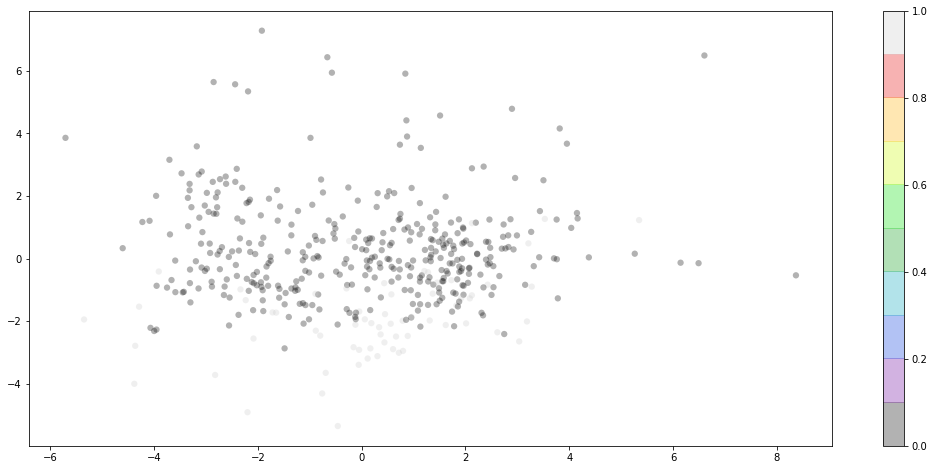

In [315]:
plt.figure(figsize=(18,8))
plt.scatter(pca_data[:, 0], pca_data[:, 1],  
            edgecolor='none', alpha=0.3, s=40, c = kmeans.labels_,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

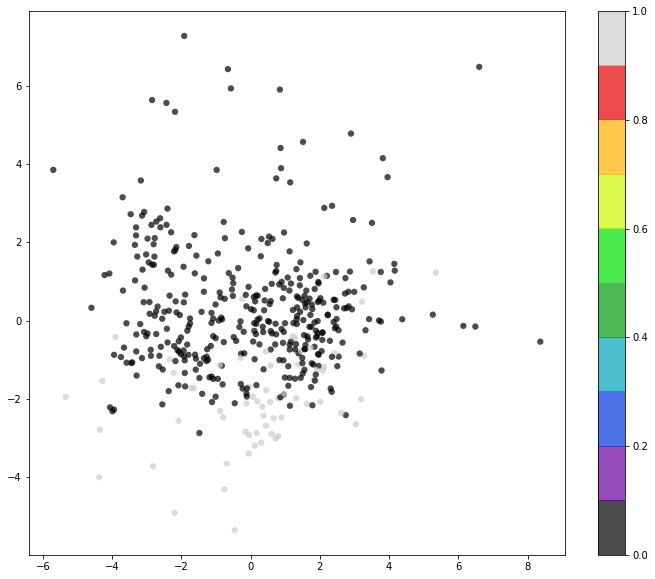

In [317]:
plt.figure(figsize=(12,10))
plt.scatter(pca_data[:, 0], pca_data[:, 1],  
            edgecolor='none', alpha=0.7, s=40, c = kmeans.labels_,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

## TNSE 

In [220]:
tnse = TSNE(n_components = 2, random_state=0)
tnse_data = tnse.fit_transform(np.log(data[features]))

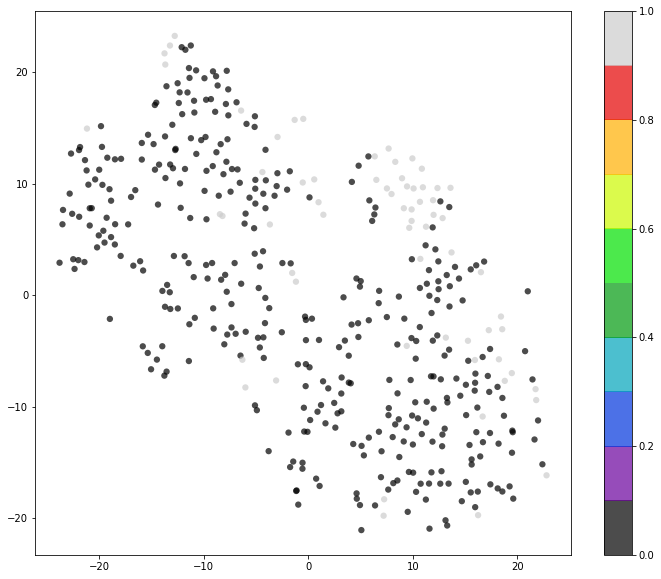

In [318]:
plt.figure(figsize=(12,10))
plt.scatter(tnse_data[:, 0], tnse_data[:, 1],  
            edgecolor='none', alpha=0.7, s=40, c = kmeans.labels_,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

Видно, что два кластера четко прослеживается, а три - не очень. Видимо основные различия присутсвуют в кластерах по каналу привлечения, а не по регионам. 

# Кластеризация

Сначала обязательно надо подготовить данные с помощью стандартизации. 

В основу возьмем два кластера. Алгоритмы сделаем такие: 

    - K-means 
    
    - DBSCAN
    
    - Спектральаня кластеризация 
    
Метрики для сравения:

    - ARI
    
    - Гомогенность 
    
    - Силуэт

In [293]:
data[features]

,fresh,milk,grocery,frozen,detergents_paper,delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


## K-means

Опытным путем мы уже выяснили, что проглядываются лучше два кластера, поэтому так и оставим число кластеров - очень важный параметр кминса. 

In [255]:
#данные которые будем кластеризовать
data[features]

,fresh,milk,grocery,frozen,detergents_paper,delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [304]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data[features])

KMeans(n_clusters=2, random_state=0)

In [305]:
#кластеры
kmeans.labels_

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [306]:
silhouette_score(data[features], kmeans.labels_)

0.5115333898779053

In [300]:
accuracy_score?